In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [17]:
start = '2013-01-01'
end = '2023-12-11'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [18]:
data.reset_index(inplace=True)

In [19]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,17.918339,18.107130,17.846855,18.013729,18.013729,102033017
1,2013-01-03,18.055573,18.229919,17.950716,18.024191,18.024191,93075567
2,2013-01-04,18.165413,18.467529,18.124067,18.380356,18.380356,110954331
3,2013-01-07,18.317591,18.415474,18.196297,18.300158,18.300158,66476239
4,2013-01-08,18.319834,18.338762,18.043119,18.264042,18.264042,67295297
...,...,...,...,...,...,...,...
2749,2023-12-04,131.294006,131.449997,129.399994,130.630005,130.630005,24117100
2750,2023-12-05,130.369995,133.539993,129.729996,132.389999,132.389999,19235100
2751,2023-12-06,132.899994,133.309998,131.309998,131.429993,131.429993,16360600
2752,2023-12-07,136.600006,140.000000,136.229996,138.449997,138.449997,38419400


In [20]:
ma_100_days = data.Close.rolling(100).mean()

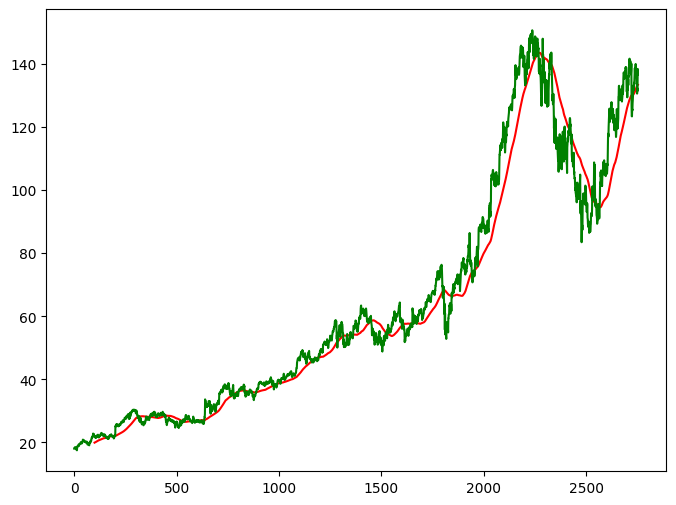

In [21]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [22]:
ma_200_days = data.Close.rolling(200).mean()

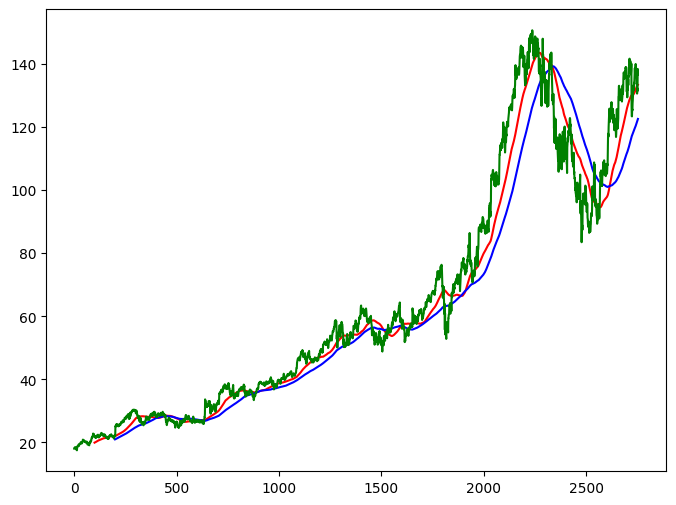

In [23]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [24]:
data.dropna(inplace=True)

In [25]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [26]:
data_train.shape[0]

2203

In [27]:
data_test.shape[0]

551

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
data_train_scale = scaler.fit_transform(data_train)

In [30]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [31]:
x, y = np.array(x), np.array(y)

In [32]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [34]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [35]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50

66/66 [==============================] - 26s 209ms/step - loss: 0.0239
Epoch 2/50
66/66 [==============================] - 13s 199ms/step - loss: 0.0044
Epoch 3/50
66/66 [==============================] - 13s 194ms/step - loss: 0.0042
Epoch 4/50
66/66 [==============================] - 13s 196ms/step - loss: 0.0034
Epoch 5/50
66/66 [==============================] - 13s 199ms/step - loss: 0.0033
Epoch 6/50
66/66 [==============================] - 14s 206ms/step - loss: 0.0038
Epoch 7/50
66/66 [==============================] - 13s 204ms/step - loss: 0.0027
Epoch 8/50
66/66 [==============================] - 15s 226ms/step - loss: 0.0026
Epoch 9/50
66/66 [==============================] - 13s 198ms/step - loss: 0.0026
Epoch 10/50
66/66 [==============================] - 13s 194ms/step - loss: 0.0029
Epoch 11/50
66/66 [==============================] - 13s 193ms/step - loss: 0.0026
Epoch 12/50
66/66 [==============================] - 13s 192ms/step - loss: 0.0022
Epoch 13/50


In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [37]:
pas_100_days = data_train.tail(100)

In [38]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [39]:
data_test_scale  =  scaler.fit_transform(data_test)

In [40]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [41]:
y_predict = model.predict(x)

18/18 [==============================] - 4s 95ms/step


In [42]:
scale =1/scaler.scale_

In [43]:
y_predict = y_predict*scale

In [44]:
y = y*scale

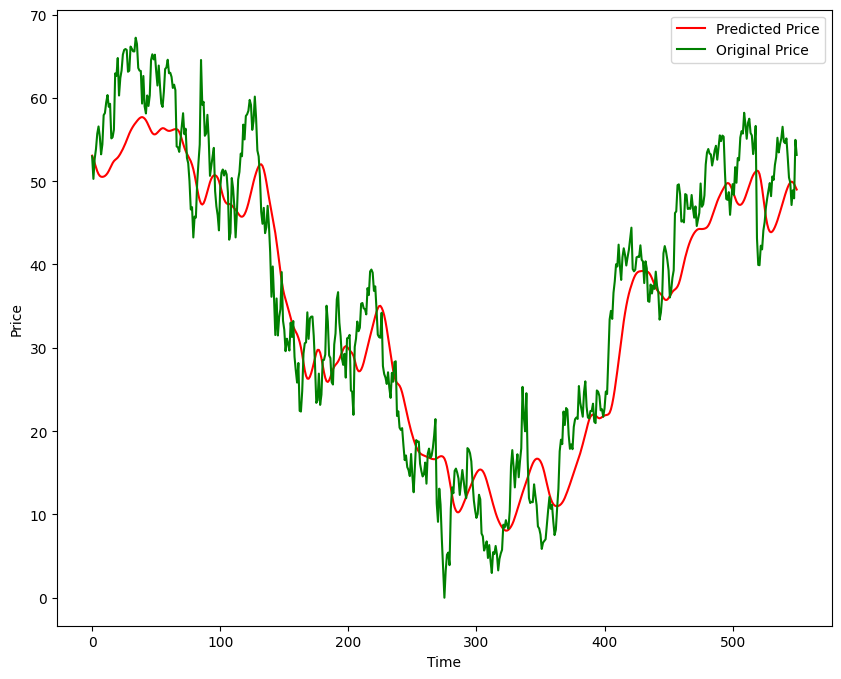

In [45]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [46]:
model.save('Stock Predictions Model.keras')